# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

In [36]:
x_values = [17, 51, 27, 21, 36, 48, 19, 26, 54, 30]
y_values = [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]
student_data = pd.DataFrame({'Age': x_values, 'Tardies': y_values})
student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

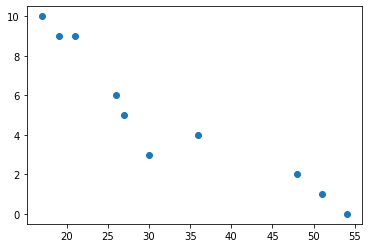

In [37]:
x = student_data ['Age'] 
y = student_data ['Tardies'] 

plt.scatter(x,y)
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [38]:
'''
A negative linear relationship: One variable increases (AGE) while the other variable decreases (TARDIES).
A negative correlation describes the extent to which two variables move in opposite directions'''


'\nA negative linear relationship: One variable increases (AGE) while the other variable decreases (TARDIES).\nA negative correlation describes the extent to which two variables move in opposite directions'

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [39]:
# Your response here.
#correlation:
x = student_data['Age']
y = student_data['Tardies']
corr = x.corr(y)
corr

-0.9391626886887122

In [40]:
#covariance:
cov = x.cov(y)
cov

-45.56666666666666

In [41]:
'''Covariance is a way to describe the linear relationship between two variables.
The covariance describes only the direction the linear correlation between both variables and not the strength.
Negative covariance -> Anti-correlation between variables. one goes up, the other goes down.

The correlation provides the direction and strength of the linear relationship between two variables.
the correlation gices us a standardized measure of the linear relationship between the two variables.
If the coefficient value lies between . 0.50 and . 1, then it is said to be a strong negative correlation.
'''

'Covariance is a way to describe the linear relationship between two variables.\nThe covariance describes only the direction the linear correlation between both variables and not the strength.\nNegative covariance -> Anti-correlation between variables. one goes up, the other goes down.\n\nThe correlation provides the direction and strength of the linear relationship between two variables.\nthe correlation gices us a standardized measure of the linear relationship between the two variables.\nIf the coefficient value lies between . 0.50 and . 1, then it is said to be a strong negative correlation.\n'

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [42]:
results = stats.linregress(x,y)
print(results)


LinregressResult(slope=-0.2428207709159808, intercept=12.888803363135768, rvalue=-0.9391626886887121, pvalue=5.56665383455343e-05, stderr=0.03139728816158607)


In [43]:
a= results[0]
b= results[1]
print(f'y = {a}*x + {b}')


y = -0.2428207709159808*x + 12.888803363135768


In [44]:
regression_line = a*x + b


Plot your regression model on your scatter plot.

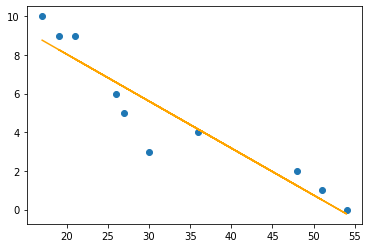

In [45]:
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [46]:
'''There's a Linear Regression between the variables  - The relationship between X and Y is linear 
A simple linear regression, is when only one X (Age) variable is used to predict the outcome variable (Tardies).
In the case of linear univariate analysis, we can model this relationship using a straight line.
'''


"There's a Linear Regression between the variables  - The relationship between X and Y is linear \nA simple linear regression, is when only one X (Age) variable is used to predict the outcome variable (Tardies).\nIn the case of linear univariate analysis, we can model this relationship using a straight line.\n"

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [47]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles


,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35947,smart,fortwo coupe,2013,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35948,smart,fortwo coupe,2014,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,243.000000,1100
35949,smart,fortwo coupe,2015,1.0,3.0,Auto(AM5),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,38,36,244.000000,1100
35950,smart,fortwo coupe,2016,0.9,3.0,Auto(AM6),Rear-Wheel Drive,Two Seaters,Premium,9.155833,34,39,36,246.000000,1100


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [48]:
data = vehicles[['Year','Cylinders', 'Fuel Barrels/Year','Combined MPG', 'Fuel Cost/Year','CO2 Emission Grams/Mile']]
data

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
0,1984,4.0,19.388824,17,1950,522.764706
1,1984,6.0,25.354615,13,2550,683.615385
2,1985,4.0,20.600625,16,2100,555.437500
3,1985,6.0,25.354615,13,2550,683.615385
4,1987,6.0,20.600625,16,2550,555.437500
...,...,...,...,...,...,...
35947,2013,3.0,9.155833,36,1100,244.000000
35948,2014,3.0,9.155833,36,1100,243.000000
35949,2015,3.0,9.155833,36,1100,244.000000
35950,2016,3.0,9.155833,36,1100,246.000000


In [49]:
corr = data.corr() 
corr

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [50]:
'''Which variable do you think will be the most important in determining CO2 emissions?
R: Fuel Cost/Year (corr = 0.930865), Combined MPG (corr = -0.926229),Fuel Barrels/Year (corr = 0.986189)

Which provides the least amount of helpful information for determining CO2 emissions? 
R: Year (corr = -0.222300)
'''


'Which variable do you think will be the most important in determining CO2 emissions?\nR: Fuel Cost/Year (corr = 0.930865), Combined MPG (corr = -0.926229),Fuel Barrels/Year (corr = 0.986189)\n\nWhich provides the least amount of helpful information for determining CO2 emissions? \nR: Year (corr = -0.222300)\n'

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [51]:
# we are defining our independent variables -> here we define more than one variable
X = vehicles[['Year','Cylinders', 'Fuel Barrels/Year','Combined MPG', 'Fuel Cost/Year']]
target = vehicles[['CO2 Emission Grams/Mile']]

# include the Y intercept -> by default not included
X = sm.add_constant(X)

y = target["CO2 Emission Grams/Mile"]



In [52]:
# define our model -> perform the fit
# OLS -> ordinary least squares
model = sm.OLS(y,X).fit()


# define our predictions by applying the model
predictions = model.predict(X)

'''MULTIPLE LINEAR REGRESSION '''



'MULTIPLE LINEAR REGRESSION '

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [53]:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared:                       0.981
Model:                                 OLS   Adj. R-squared:                  0.981
Method:                      Least Squares   F-statistic:                 3.687e+05
Date:                     Thu, 21 Jan 2021   Prob (F-statistic):               0.00
Time:                             16:25:06   Log-Likelihood:            -1.5173e+05
No. Observations:                    35952   AIC:                         3.035e+05
Df Residuals:                        35946   BIC:                         3.035e+05
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               769.8883     19.392     39.702      0.000     731.880     807.897
Year                 -0.3206      0.010    -33.060      0.000      -0.340      -0.302
Cylinders             1.8788      0.083     22.598      0.000       1.716       2.042
Fuel Barrels/Year    19.0529      0.061    311.600      0.000      18.933      19.173
Combined MPG         -3.0404      0.042    -71.645      0.000      -3.124      -2.957
Fuel Cost/Year        0.0323      0.000     67.025      0.000       0.031       0.033
==============================================================================
Omnibus:                    71055.645   Durbin-Watson:                   0.747
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        246941260.782
Skew:                          15.902   Prob(JB):                         0.00
Kurtosis:                     407.766   Cond. No.                     6.20e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [54]:
'''What are the most important varibles in your model and why?

coef = the betas for each X variable
'''

'What are the most important varibles in your model and why?\n\ncoef = the betas for each X variable\n'

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [55]:
x_values = [1, 3, 4, 6, 8, 9, 11, 14]
y_values = [1, 2, 4, 4, 5, 7, 8, 13]
party = pd.DataFrame({'X': x_values, 'Y': y_values})
party


,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

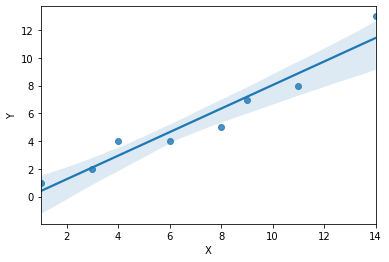

In [56]:
sns.regplot(x='X', y='Y', data=party);

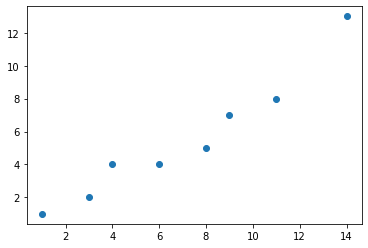

In [57]:
x = party['X'] 
y = party['Y'] 

plt.scatter(x,y)
plt.show()

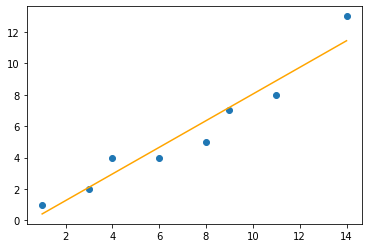

In [58]:
results = stats.linregress(x,y)
regression_line = results[1] + results[0]*x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [59]:
print(results)



LinregressResult(slope=0.8484848484848485, intercept=-0.43939393939393945, rvalue=0.9652303546573691, pvalue=0.00010236374464090686, stderr=0.09380896778286217)


In [ ]:
'''There's a Linear Regression between the variables  - The relationship between X and Y is linear 
A simple linear regression, is when only one X variable is used to predict the outcome variable (Y).
In the case of linear univariate analysis, we can model this relationship using a straight line.
'''


In [60]:
a= results[0]
b= results[1]
print(f'y = {a}*x + {b}')

y = 0.8484848484848485*x + -0.43939393939393945


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

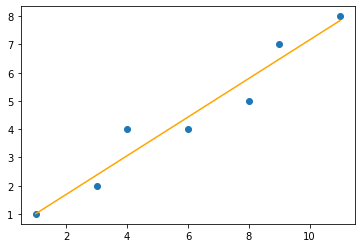

In [64]:
x_values = [1, 3, 4, 6, 8, 9, 11]
y_values = [1, 2, 4, 4, 5, 7, 8]
df = pd.DataFrame({'X': x_values, 'Y': y_values})

x = df['X']
y = df['Y']

results = stats.linregress(x,y)
regression_line = results[1] + results[0]*x
plt.plot(x, regression_line, c = 'orange')
plt.scatter(x,y)
plt.show()

In [66]:
print(results)

LinregressResult(slope=0.6842105263157895, intercept=0.32330827067669166, rvalue=0.971278116825086, pvalue=0.0002644056885656864, stderr=0.07496206665031292)


In [65]:
a= results[0]
b= results[1]
print(f'y = {a}*x + {b}')


y = 0.6842105263157895*x + 0.32330827067669166


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [62]:
'''The slope and intercept changed. R-value increased, telling us that our model is a better reflection of the data (since the distance average for all point to the model line is smaller)
In general, the higher the R-squared, the better the model fits your data.'''
